First 5 rows of the dataset:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Pen,East,227.24,225.21,0.05,Furniture,2022-08-02
1,Monitor,North,897.93,196.64,0.05,Technology,2022-12-19
2,Notebook,North,562.38,255.52,0.00,Office Supplies,2022-08-05
3,Monitor,North,817.07,199.00,0.05,Furniture,2022-09-16
4,Monitor,East,901.29,172.65,0.00,Technology,2023-01-01



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   100 non-null    object 
 1   Region    100 non-null    object 
 2   Sales     100 non-null    float64
 3   Profit    100 non-null    float64
 4   Discount  100 non-null    float64
 5   Category  100 non-null    object 
 6   Date      100 non-null    object 
dtypes: float64(3), object(4)
memory usage: 5.6+ KB

Statiscal Summary:


,Sales,Profit,Discount
count,100.000000,100.00000,100.000000
mean,504.964500,163.85870,0.105500
std,278.276122,85.47417,0.073476
min,54.810000,9.56000,0.000000
25%,273.177500,96.83250,0.050000
50%,524.970000,170.95500,0.100000
75%,720.045000,239.62500,0.200000
max,986.370000,297.07000,0.200000


Number of duplicate rows: 0
Missing values before cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64
Missing values after cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

Data after cleaning:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Pen,East,227.24,225.21,0.05,Furniture,2022-08-02
1,Monitor,North,897.93,196.64,0.05,Technology,2022-12-19
2,Notebook,North,562.38,255.52,0.00,Office Supplies,2022-08-05
3,Monitor,North,817.07,199.00,0.05,Furniture,2022-09-16
4,Monitor,East,901.29,172.65,0.00,Technology,2023-01-01


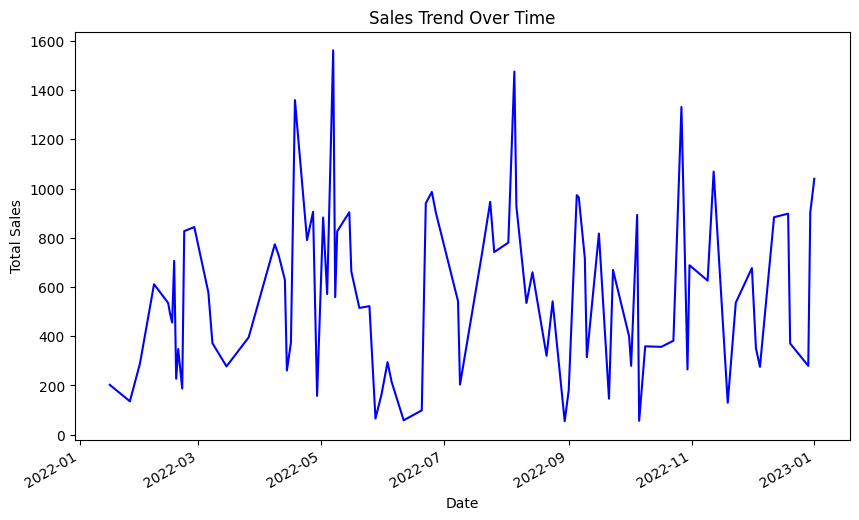

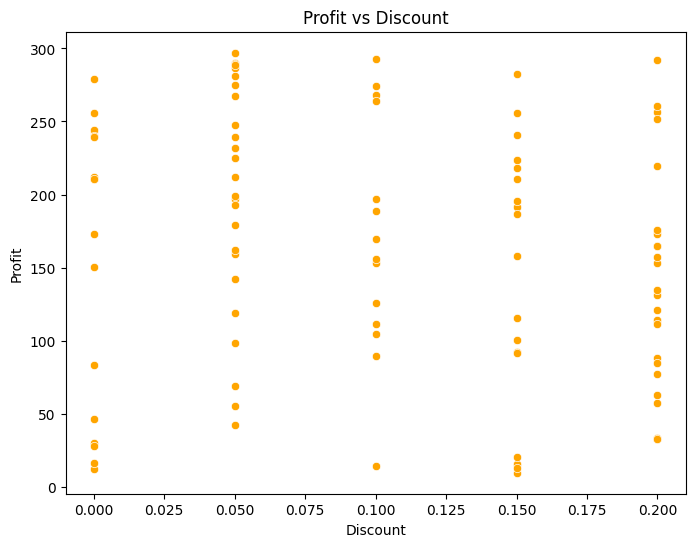

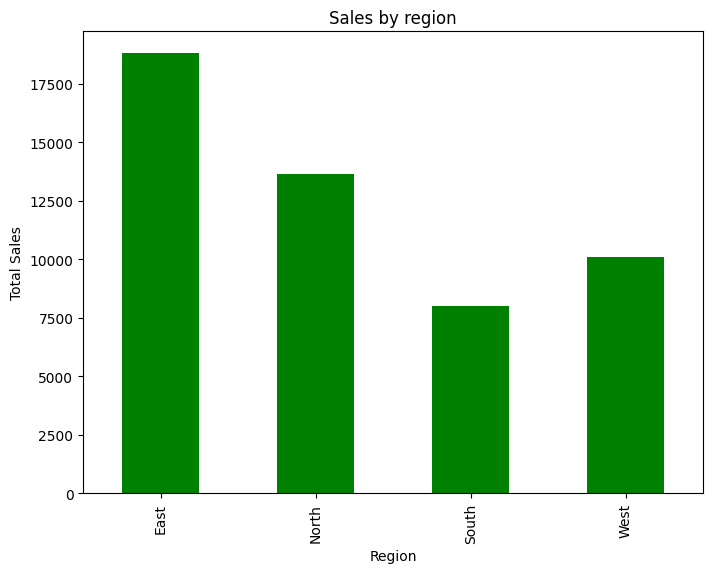

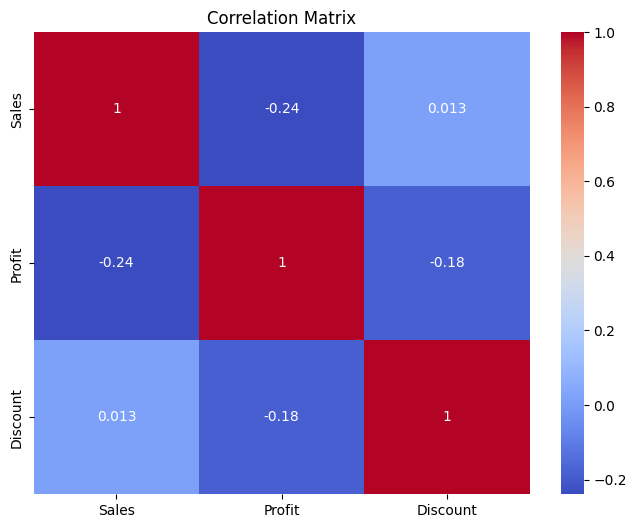

Mean Squared Error: 72361.39
R-squared Score: -0.16


In [7]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_csv('sales_data.csv')

#Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

#Basic information about the dataset
print("\nDataset Information:")
df.info()

#Statistical summary of numerical columns
print("\nStatiscal Summary:")
display(df.describe())

#Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#Remove duplicates
df = df.drop_duplicates()

#Handle missing values
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

# Fill missing values in numeric columns with their respective means
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())

print(f"Missing values after cleaning:\n{df.isnull().sum()}")

#Convery 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

#Verify the changes
print("\nData after cleaning:")
display(df.head())


#Plot sales trends over time
plt.figure(figsize=(10, 6))
df.groupby('Date')['Sales'].sum().plot(kind='line', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

#Scatter Plot: Profit vs Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

#Sales distribution by region
plt.figure(figsize=(8, 6))
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', color='green')
plt.title('Sales by region')
plt.ylabel('Total Sales')
plt.show()

#Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Select features and target
X = df[['Profit', 'Discount']]
y = df['Sales']

#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make Predictions
y_pred = model.predict(X_test)

#Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")
